In [ ]:
# Main code is adopted from
# http://databookuw.com/page-2/page-21/
# Denoise data
# https://colab.research.google.com/drive/1PzfvfjR-0OgNSw13o9XEp6C7y4fnUb1a?authuser=1
# https://www.youtube.com/watch?v=s2K1JfNR7Sc

In [ ]:
pip install yfinance

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
symbol = "SBIN.NS"
df     = yf.download(symbol, period="1mo", interval = "15m", 
                   rounding=True, progress=False)
df     = df.reset_index(drop=True)
#df     = df.iloc[:-1] # Removing last data

In [50]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
0,547.45,554.35,547.35,554.15,554.15,1136605
1,554.00,554.20,550.55,553.00,553.00,996188
2,553.00,555.15,552.95,555.00,555.00,904189
3,555.10,555.90,554.50,555.25,555.25,709331
4,555.40,556.95,555.35,556.75,556.75,806379


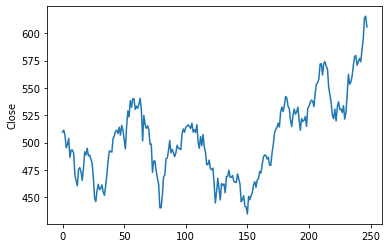

In [ ]:
sns.lineplot(data= df["Close"]);

In [ ]:
# Compute the Fast Fourier Transform (FFT)
f    = df["Close"].values
n    = len(f)
dt   = 1
t    = np.arange(0,n,1)
fhat = np.fft.fft(f,n)                        # Compute the FFT
PSD  = fhat * np.conj(fhat) / n               # Power spectrum (power per freq)
freq = (1/(dt*n)) * np.arange(n)              # Create x-axis of frequencies in Hz
L    = np.arange(1,np.floor(n/2),dtype='int') # Only plot the first half of freqs

In [ ]:
#plt.plot(freq[L],PSD[L],color='r',LineWidth=2,label='Noisy')
#plt.show();

In [ ]:
## Use the PSD to filter out noise
indices  = PSD > 100         # Find all freqs with large power
PSDclean = PSD * indices     # Zero out all others
fhat     = indices * fhat    # Zero out small Fourier coeffs. in Y
ffilt    = np.fft.ifft(fhat) # Inverse FFT for filtered time signal

In [ ]:
fhat

In [ ]:
indices

array([ True,  True,  True, ...,  True,  True,  True])

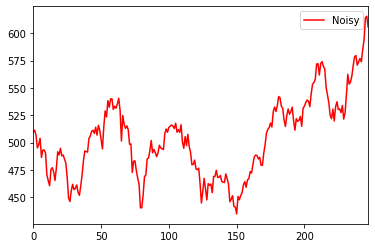

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


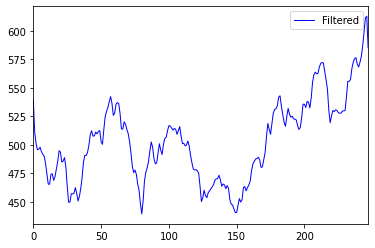

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


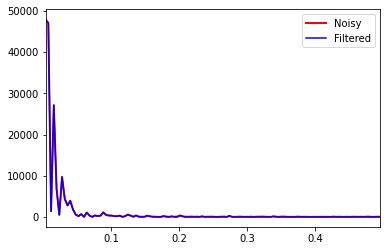

In [ ]:
## Plots
plt.plot(t,df["Close"].values,color='r',LineWidth=1.5,label='Noisy')
plt.xlim(t[0],t[-1])
plt.legend()
plt.show()

plt.plot(t,ffilt,color='b',LineWidth=1,label='Filtered')
plt.xlim(t[0],t[-1])
plt.legend()
plt.show()

plt.plot(freq[L],PSD[L],color='r',LineWidth=2,label='Noisy')
plt.plot(freq[L],PSDclean[L],color='b',LineWidth=1.5,label='Filtered')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.show()

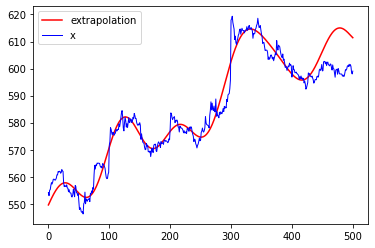

In [63]:
#https://gist.github.com/tartakynov/83f3cd8f44208a1856ce
import numpy as np
import pylab as pl
from numpy import fft
    
def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 5                     # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = list(range(n))
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t
    
def main():
    #x = np.array([669, 592, 664, 1005, 699, 401, 646, 472, 598, 681, 1126, 1260, 562, 491, 714, 530, 521, 687, 776, 802, 499, 536, 871, 801, 965, 768, 381, 497, 458, 699, 549, 427, 358, 219, 635, 756, 775, 969, 598, 630, 649, 722, 835, 812, 724, 966, 778, 584, 697, 737, 777, 1059, 1218, 848, 713, 884, 879, 1056, 1273, 1848, 780, 1206, 1404, 1444, 1412, 1493, 1576, 1178, 836, 1087, 1101, 1082, 775, 698, 620, 651, 731, 906, 958, 1039, 1105, 620, 576, 707, 888, 1052, 1072, 1357, 768, 986, 816, 889, 973, 983, 1351, 1266, 1053, 1879, 2085, 2419, 1880, 2045, 2212, 1491, 1378, 1524, 1231, 1577, 2459, 1848, 1506, 1589, 1386, 1111, 1180, 1075, 1595, 1309, 2092, 1846, 2321, 2036, 3587, 1637, 1416, 1432, 1110, 1135, 1233, 1439, 894, 628, 967, 1176, 1069, 1193, 1771, 1199, 888, 1155, 1254, 1403, 1502, 1692, 1187, 1110, 1382, 1808, 2039, 1810, 1819, 1408, 803, 1568, 1227, 1270, 1268, 1535, 873, 1006, 1328, 1733, 1352, 1906, 2029, 1734, 1314, 1810, 1540, 1958, 1420, 1530, 1126, 721, 771, 874, 997, 1186, 1415, 973, 1146, 1147, 1079, 3854, 3407, 2257, 1200, 734, 1051, 1030, 1370, 2422, 1531, 1062, 530, 1030, 1061, 1249, 2080, 2251, 1190, 756, 1161, 1053, 1063, 932, 1604, 1130, 744, 930, 948, 1107, 1161, 1194, 1366, 1155, 785, 602, 903, 1142, 1410, 1256, 742, 985, 1037, 1067, 1196, 1412, 1127, 779, 911, 989, 946, 888, 1349, 1124, 761, 994, 1068, 971, 1157, 1558, 1223, 782, 2790, 1835, 1444, 1098, 1399, 1255, 950, 1110, 1345, 1224, 1092, 1446, 1210, 1122, 1259, 1181, 1035, 1325, 1481, 1278, 769, 911, 876, 877, 950, 1383, 980, 705, 888, 877, 638, 1065, 1142, 1090, 1316, 1270, 1048, 1256, 1009, 1175, 1176, 870, 856, 860])
    x = df["Close"].iloc[:-50].values
    n_predict = 50
    extrapolation = fourierExtrapolation(x, n_predict)
    pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
    x = df["Close"].values
    pl.plot(np.arange(0, x.size), x, 'b', label = 'x', linewidth = 1)
    pl.legend()
    pl.show()
    
if __name__ == "__main__":
    main()

In [ ]:
# this code scans scrips and fit and extrapolate with fft
# finds the maximum r2 score and the corresponding range
#https://gist.github.com/tartakynov/83f3cd8f44208a1856ce
import numpy as np
import pylab as pl
from numpy import fft
from sklearn.metrics import r2_score
    
def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 50                     # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = list(range(n))
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t

all_score  = []
scrip_N500    = ['3MINDIA.NS', 'ABB.NS', 'POWERINDIA.NS', 'ACC.NS', 'AIAENG.NS', 'APLAPOLLO.NS', 'AUBANK.NS', 'AARTIDRUGS.NS', 'AARTIIND.NS', 'AAVAS.NS', 'ABBOTINDIA.NS', 'ADANIENT.NS', 'ADANIGREEN.NS', 'ADANIPORTS.NS', 'ATGL.NS', 'ADANITRANS.NS', 'ABCAPITAL.NS', 'ABFRL.NS', 'ADVENZYMES.NS', 'AEGISCHEM.NS', 'AFFLE.NS', 'AJANTPHARM.NS', 'AKZOINDIA.NS', 'ALEMBICLTD.NS', 'APLLTD.NS', 'ALKEM.NS', 'ALKYLAMINE.NS', 'ALOKINDS.NS', 'AMARAJABAT.NS', 'AMBER.NS', 'AMBUJACEM.NS', 'ANGELONE.NS', 'APOLLOHOSP.NS', 'APOLLOTYRE.NS', 'ASAHIINDIA.NS', 'ASHOKLEY.NS', 'ASHOKA.NS', 'ASIANPAINT.NS', 'ASTERDM.NS', 'ASTRAZEN.NS', 'ASTRAL.NS', 'ATUL.NS', 'AUROPHARMA.NS', 'AVANTIFEED.NS', 'DMART.NS', 'AXISBANK.NS', 'BASF.NS', 'BEML.NS', 'BSE.NS', 'BAJAJ-AUTO.NS', 'BAJAJCON.NS', 'BAJAJELEC.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'BAJAJHLDNG.NS', 'BALAMINES.NS', 'BALKRISIND.NS', 'BALMLAWRIE.NS', 'BALRAMCHIN.NS', 'BANDHANBNK.NS', 'BANKBARODA.NS', 'BANKINDIA.NS', 'MAHABANK.NS', 'BATAINDIA.NS', 'BAYERCROP.NS', 'BERGEPAINT.NS', 'BDL.NS', 'BEL.NS', 'BHARATFORG.NS', 'BHEL.NS', 'BPCL.NS', 'BHARATRAS.NS', 'BHARTIARTL.NS', 'BIOCON.NS', 'BIRLACORPN.NS', 'BSOFT.NS', 'BLISSGVS.NS', 'BLUEDART.NS', 'BLUESTARCO.NS', 'BBTC.NS', 'BOSCHLTD.NS', 'BRIGADE.NS', 'BRITANNIA.NS', 'BURGERKING.NS', 'CCL.NS', 'CESC.NS', 'CRISIL.NS', 'CSBBANK.NS', 'CADILAHC.NS', 'CANFINHOME.NS', 'CANBK.NS', 'CAPLIPOINT.NS', 'CGCL.NS', 'CARBORUNIV.NS', 'CASTROLIND.NS', 'CEATLTD.NS', 'CENTRALBK.NS', 'CDSL.NS', 'CENTURYPLY.NS', 'CENTURYTEX.NS', 'CERA.NS', 'CHALET.NS', 'CHAMBLFERT.NS', 'CHOLAHLDNG.NS', 'CHOLAFIN.NS', 'CIPLA.NS', 'CUB.NS', 'COALINDIA.NS', 'COCHINSHIP.NS', 'COFORGE.NS', 'COLPAL.NS', 'CAMS.NS', 'CONCOR.NS', 'COROMANDEL.NS', 'CREDITACC.NS', 'CROMPTON.NS', 'CUMMINSIND.NS', 'CYIENT.NS', 'DCBBANK.NS', 'DCMSHRIRAM.NS', 'DLF.NS', 'DABUR.NS', 'DALBHARAT.NS', 'DEEPAKNTR.NS', 'DELTACORP.NS', 'DHANI.NS', 'DHANUKA.NS', 'DBL.NS', 'DISHTV.NS', 'DCAL.NS', 'DIVISLAB.NS', 'DIXON.NS', 'LALPATHLAB.NS', 'DRREDDY.NS', 'EIDPARRY.NS', 'EIHOTEL.NS', 'EPL.NS', 'EDELWEISS.NS', 'EICHERMOT.NS', 'ELGIEQUIP.NS', 'EMAMILTD.NS', 'ENDURANCE.NS', 'ENGINERSIN.NS', 'EQUITAS.NS', 'ERIS.NS', 'ESCORTS.NS', 'EXIDEIND.NS', 'FDC.NS', 'FEDERALBNK.NS', 'FINEORG.NS', 'FINCABLES.NS', 'FINPIPE.NS', 'FSL.NS', 'FORTIS.NS', 'FCONSUMER.NS', 'FRETAIL.NS', 'GAIL.NS', 'GEPIL.NS', 'GMMPFAUDLR.NS', 'GMRINFRA.NS', 'GALAXYSURF.NS', 'GRSE.NS', 'GARFIBRES.NS', 'GICRE.NS', 'GILLETTE.NS', 'GLAND.NS', 'GLAXO.NS', 'GLENMARK.NS', 'GODFRYPHLP.NS', 'GODREJAGRO.NS', 'GODREJCP.NS', 'GODREJIND.NS', 'GODREJPROP.NS', 'GRANULES.NS', 'GRAPHITE.NS', 'GRASIM.NS', 'GESHIP.NS', 'GREAVESCOT.NS', 'GRINDWELL.NS', 'GUJALKALI.NS', 'GAEL.NS', 'FLUOROCHEM.NS', 'GUJGASLTD.NS', 'GNFC.NS', 'GPPL.NS', 'GSFC.NS', 'GSPL.NS', 'GULFOILLUB.NS', 'HEG.NS', 'HCLTECH.NS', 'HDFCAMC.NS', 'HDFCBANK.NS', 'HDFCLIFE.NS', 'HFCL.NS', 'HAPPSTMNDS.NS', 'HATSUN.NS', 'HAVELLS.NS', 'HEIDELBERG.NS', 'HEMIPROP.NS', 'HEROMOTOCO.NS', 'HSCL.NS', 'HINDALCO.NS', 'HAL.NS', 'HINDCOPPER.NS', 'HINDPETRO.NS', 'HINDUNILVR.NS', 'HINDZINC.NS', 'HONAUT.NS', 'HUDCO.NS', 'HDFC.NS', 'HUHTAMAKI.NS', 'ICICIBANK.NS', 'ICICIGI.NS', 'ICICIPRULI.NS', 'ISEC.NS', 'IDBI.NS', 'IDFCFIRSTB.NS', 'IDFC.NS', 'IFBIND.NS', 'IIFL.NS', 'IIFLWAM.NS', 'IOLCP.NS', 'IRB.NS', 'IRCON.NS', 'ITC.NS', 'ITI.NS', 'INDIACEM.NS', 'IBULHSGFIN.NS', 'IBREALEST.NS', 'INDIAMART.NS', 'INDIANB.NS', 'IEX.NS', 'INDHOTEL.NS', 'IOC.NS', 'IOB.NS', 'IRCTC.NS', 'ICIL.NS', 'INDOCO.NS', 'IGL.NS', 'INDUSTOWER.NS', 'INDUSINDBK.NS', 'INFIBEAM.NS', 'NAUKRI.NS', 'INFY.NS', 'INGERRAND.NS', 'INOXLEISUR.NS', 'INTELLECT.NS', 'INDIGO.NS', 'IPCALAB.NS', 'JBCHEPHARM.NS', 'JKCEMENT.NS', 'JKLAKSHMI.NS', 'JKPAPER.NS', 'JKTYRE.NS', 'JMFINANCIL.NS', 'JSWENERGY.NS', 'JSWSTEEL.NS', 'JTEKTINDIA.NS', 'JAMNAAUTO.NS', 'JINDALSAW.NS', 'JSLHISAR.NS', 'JSL.NS', 'JINDALSTEL.NS', 'JCHAC.NS', 'JUBLFOOD.NS', 'JUSTDIAL.NS', 'JYOTHYLAB.NS', 'KPRMILL.NS', 'KEI.NS', 'KNRCON.NS', 'KPITTECH.NS', 'KRBL.NS', 'KSB.NS', 'KAJARIACER.NS', 'KALPATPOWR.NS', 'KANSAINER.NS', 'KARURVYSYA.NS', 'KSCL.NS', 'KEC.NS', 'KOTAKBANK.NS', 'L&TFH.NS', 'LTTS.NS', 'LICHSGFIN.NS', 'LAOPALA.NS', 'LAXMIMACH.NS', 'LTI.NS', 'LT.NS', 'LAURUSLABS.NS', 'LEMONTREE.NS', 'LINDEINDIA.NS', 'LUPIN.NS', 'LUXIND.NS', 'MASFIN.NS', 'MMTC.NS', 'MOIL.NS', 'MRF.NS', 'MGL.NS', 'MAHSCOOTER.NS', 'MAHSEAMLES.NS', 'M&MFIN.NS', 'M&M.NS', 'MAHINDCIE.NS', 'MHRIL.NS', 'MAHLOG.NS', 'MANAPPURAM.NS', 'MRPL.NS', 'MARICO.NS', 'MARUTI.NS', 'MFSL.NS', 'MAXHEALTH.NS', 'MAZDOCK.NS', 'METROPOLIS.NS', 'MINDTREE.NS', 'MINDACORP.NS', 'MINDAIND.NS', 'MIDHANI.NS', 'MOTILALOFS.NS', 'MPHASIS.NS', 'MCX.NS', 'MUTHOOTFIN.NS', 'NATCOPHARM.NS', 'NBCC.NS', 'NCC.NS', 'NESCO.NS', 'NHPC.NS', 'NLCINDIA.NS', 'NMDC.NS', 'NOCIL.NS', 'NTPC.NS', 'NH.NS', 'NATIONALUM.NS', 'NFL.NS', 'NAVINFLUOR.NS', 'NESTLEIND.NS', 'NETWORK18.NS', 'NILKAMAL.NS', 'NAM-INDIA.NS', 'OBEROIRLTY.NS', 'ONGC.NS', 'OIL.NS', 'OFSS.NS', 'PIIND.NS', 'PNBHOUSING.NS', 'PNCINFRA.NS', 'PVR.NS', 'PAGEIND.NS', 'PERSISTENT.NS', 'PETRONET.NS', 'PFIZER.NS', 'PHILIPCARB.NS', 'PHOENIXLTD.NS', 'PIDILITIND.NS', 'PEL.NS', 'POLYMED.NS', 'POLYCAB.NS', 'POLYPLEX.NS', 'PFC.NS', 'POWERGRID.NS', 'PRESTIGE.NS', 'PRINCEPIPE.NS', 'PRSMJOHNSN.NS', 'PGHL.NS', 'PGHH.NS', 'PNB.NS', 'QUESS.NS', 'RBLBANK.NS', 'RECLTD.NS', 'RITES.NS', 'RADICO.NS', 'RVNL.NS', 'RAIN.NS', 'RAJESHEXPO.NS', 'RALLIS.NS', 'RCF.NS', 'RATNAMANI.NS', 'RAYMOND.NS', 'REDINGTON.NS', 'RELAXO.NS', 'RELIANCE.NS', 'RESPONIND.NS', 'ROSSARI.NS', 'ROUTE.NS', 'SBICARD.NS', 'SBILIFE.NS', 'SIS.NS', 'SJVN.NS', 'SKFINDIA.NS', 'SRF.NS', 'SANOFI.NS', 'SCHAEFFLER.NS', 'SCHNEIDER.NS', 'SEQUENT.NS', 'SHARDACROP.NS', 'SFL.NS', 'SHILPAMED.NS', 'SCI.NS', 'SHOPERSTOP.NS', 'SHREECEM.NS', 'SHRIRAMCIT.NS', 'SRTRANSFIN.NS', 'SIEMENS.NS', 'SOBHA.NS', 'SOLARINDS.NS', 'SOLARA.NS', 'SONATSOFTW.NS', 'SPANDANA.NS', 'SPICEJET.NS', 'STARCEMENT.NS', 'SBIN.NS', 'SAIL.NS', 'SWSOLAR.NS', 'STLTECH.NS', 'STAR.NS', 'SUDARSCHEM.NS', 'SUMICHEM.NS', 'SPARC.NS', 'SUNPHARMA.NS', 'SUNTV.NS', 'SUNCLAYLTD.NS', 'SUNDARMFIN.NS', 'SUNDRMFAST.NS', 'SUNTECK.NS', 'SUPRAJIT.NS', 'SUPREMEIND.NS', 'SUPPETRO.NS', 'SUVENPHAR.NS', 'SUZLON.NS', 'SWANENERGY.NS', 'SYMPHONY.NS', 'SYNGENE.NS', 'TCIEXP.NS', 'TCNSBRANDS.NS', 'TTKPRESTIG.NS', 'TV18BRDCST.NS', 'TVSMOTOR.NS', 'TANLA.NS', 'TASTYBITE.NS', 'TATACHEM.NS', 'TATACOFFEE.NS', 'TATACOMM.NS', 'TCS.NS', 'TATACONSUM.NS', 'TATAELXSI.NS', 'TATAINVEST.NS', 'TATAMTRDVR.NS', 'TATAMOTORS.NS', 'TATAPOWER.NS', 'TATASTEEL.NS', 'TEAMLEASE.NS', 'TECHM.NS', 'NIACL.NS', 'RAMCOCEM.NS', 'THERMAX.NS', 'THYROCARE.NS', 'TIMKEN.NS', 'TITAN.NS', 'TORNTPHARM.NS', 'TORNTPOWER.NS', 'TRENT.NS', 'TRIDENT.NS', 'TRITURBINE.NS', 'TIINDIA.NS', 'UCOBANK.NS', 'UFLEX.NS', 'UPL.NS', 'UTIAMC.NS', 'UJJIVAN.NS', 'UJJIVANSFB.NS', 'ULTRACEMCO.NS', 'UNIONBANK.NS', 'UBL.NS', 'MCDOWELL-N.NS', 'VGUARD.NS', 'VMART.NS', 'VIPIND.NS', 'VSTIND.NS', 'VAIBHAVGBL.NS', 'VAKRANGEE.NS', 'VALIANTORG.NS', 'VTL.NS', 'VARROC.NS', 'VBL.NS', 'VEDL.NS', 'VENKEYS.NS', 'VINATIORGA.NS', 'IDEA.NS', 'VOLTAS.NS', 'WABCOINDIA.NS', 'WELCORP.NS', 'WELSPUNIND.NS', 'WESTLIFE.NS', 'WHIRLPOOL.NS', 'WIPRO.NS', 'WOCKPHARMA.NS', 'YESBANK.NS', 'ZEEL.NS', 'ZENSARTECH.NS', 'ZYDUSWELL.NS', 'ECLERX.NS']
n_predict  = 30
for symbol in scrip_N500:
  try:
    df    = yf.download(symbol, period="1mo", interval = "5m",
                        rounding=True, progress=False)
    df    = df.reset_index(drop=True)
    score = []
    for i in range(1400):
      x_train = df["Close"].iloc[i:-n_predict].values
      y_pred  = fourierExtrapolation(x_train, n_predict)[-n_predict:]
      y_test  = df["Close"].iloc[-n_predict:].values
      score.append([r2_score(y_test, y_pred), i])

    score     = sorted(score, reverse=True)[0:1]
    all_score.append([score, symbol])
  except:
    print()

In [97]:
sorted(all_score, reverse=True)[0:5]

[[[[0.9383658834909349, 1390]], 'INOXLEISUR.NS'],
 [[[0.8756633424673336, 871]], 'WESTLIFE.NS'],
 [[[0.8753586359233662, 1368]], 'ICICIPRULI.NS'],
 [[[0.8740267933167862, 406]], 'BAJAJ-AUTO.NS'],
 [[[0.8597060234125157, 18]], 'INDIANB.NS']]

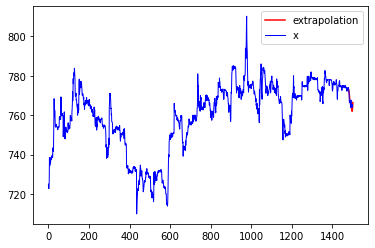

In [101]:
symbol = "WESTLIFE.NS"
df     = yf.download(symbol, period="1mo", interval = "5m", 
                   rounding=True, progress=False)
df     = df.reset_index(drop=True)

x_train = df["Close"].iloc[871:-n_predict].values
y_pred  = fourierExtrapolation(x_train, n_predict)[-n_predict:]
y_test  = df["Close"].iloc[-n_predict:].values

pl.plot(np.arange(1471, 1471+y_pred.size), y_pred, 'r', label = 'extrapolation')
x = df["Close"].values
pl.plot(np.arange(0, x.size), x, 'b', label = 'x', linewidth = 1)
pl.legend()
pl.show()